In [1]:
import numpy as np 
import scipy as sp

### Interest rates

Ex 1:  John Doe intends to buy a house in Buffalo, New York, with a price tag of $240,000. He plans to pay 20% of the price of the house as a down payment and borrow the rest from M&T Bank. For a 30-year mortgage, the bank offers an annual rate of 4.25%. How much is his monthly mortgage payment? 

In [5]:
sp.pmt(0.045/12, 30*12, 240000*0.8)

-972.83579486570068

Ex2: Assume that we bought a bond for \$825 today. It has a maturity term of 5 years. The
coupon rate is 3\% and coupon payments are annual. If the face value is $1,000, what
is the YTM?

In [2]:
sp.rate(5, 1000*0.03, -825, 1000)

0.073027413603042532

### Simple interest rate versus compounding interest rate

- The formula for payment of a simple interest rate is : 
**FV(simple interest)** = PV * (1+R*n)

- The future value for coumpounded interest is: 
**FV(compounded interest)** = PV * (1+R)^n

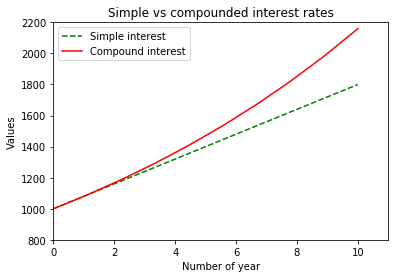

In [10]:
import numpy as np
import matplotlib.pyplot as plt
pv = 1000
r=0.08
n = 10
t = np.linspace(0, n, n)
y1 = pv * (1 + r*t)
y2 = pv * (1 + r)**t
plt.plot(t, y1, 'g--', label="Simple interest")
plt.plot(t, y2, 'r-', label="Compound interest")
plt.legend(loc=2)
plt.title("Simple vs compounded interest rates")
plt.xlabel("Number of year")
plt.ylabel("Values")
plt.xlim(0, 11)
plt.ylim(800, 2200)
plt.show()

### Several Python functions related to interest conversion

In [11]:
def APR2Rm(APR1, m1, m2):
    """
        Objective: convert on APR to another Rm 
            APR1: Annual Percentage Rate
            m1: compounding frequency
            m2: effective period rate with this compounding
        Formula used: Rm = (1 + APR1/m1) ^ m1/m2 - 1 
    """
    return (1 + APR1/ m1) ** (m1/m2) - 1

def APR2APR(APR1, m1, m2):
    """
        Objective: convert one APR to another APR
            APR1: annual percentage rate
             m1: compounding frequency
             m2: effective period rate with this compounding
        Formula used: APR2=m2* [(1+APR1/m1)**(m1/m2)-1]
    """
    return m2*((1+APR1/m1)**(m1/m2) - 1)

def APR2Rc(APR,m):
    return m*log(1+APR/m)

def Rc2Rm(Rc,m):
    return exp(Rc/m)-1

def Rc2APR(Rc,m):
    return m*(exp(Rc/m)-1)

### Python Program to estimate stock price based on an n-perioddd model

For an n-period model, we have n + 1 future cash flows: **n dividends** plus **one selling price**

``` Python
P0 =  d1/(1 + Re) + d2/(1+Re)^2 + d3/(1+Re)^3 + ... + Pn/(1+Re)^n
with
Pn = dn+1/R-g (selling price)
```

In [12]:
def pvValueNperiodModel(r,longTermGrowthRate,dividendNplus1):
    """ Objective: estimate stock price based on an n-period model
            r: discount rate
            LongTermGrowhRate: long term dividend growth rate
            dividendsNpus1 : a dividend vector n + 1
            PV = d1/(1+R) + d2/(1+R)**2 + .... + dn/(1+R)**n + sellingPrice/(1+R)**n
            sellingPrice= d(n+1)/(r-g)
        where g is long term growth rate
        Example #1: >>> r=0.182
        >>> g=0.03
        >>> d=[1.8,2.07,2.277,2.48193,2.68,2.7877]
        >>>pvValueNperiodModel(r,g,d)
         17.472364312825711
    """
    import scipy as sp
    d=dividendNplus1
    n=len(d)-1
    g=longTermGrowthRate
    pv=sp.npv(r,d[:-1])*(1+r)
    sellingPrice=d[n]/(r-g)
    pv+=sp.pv(r,n,0,-sellingPrice)
    return pv

### Python program to estimate the duration of bond

In [15]:
def durationBond(rate,couponRate,maturity):
    """Objective : estimte the durtion for a given bond
         rate : discount rate
        couponRate: coupon rate
         maturity : number of years
     Example 1: 
        >>>discountRate=0.1
        >>>couponRate=0.04
        >>> n=4
        >>>durationBond(rate,couponRate,n)
         3.5616941835365492
     Example #2
        >>>durationBond(0.1,0.04,4)
         3.7465335177625576
    """
    import scipy as sp
    d=0
    n=maturity
    for i in sp.arange(n):
        d+=(i+1)*sp.pv(rate,i+1,0,-couponRate)
        d+=n*sp.pv(rate,nper,0,-1)
    return d/sp.pv(rate,n,-couponRate,-1)